<a href="https://colab.research.google.com/github/linheri06/the_text_recognition1/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# lstm for time series forecasting
from numpy import sqrt
import numpy as np
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN,GRU
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D,BatchNormalization
from sklearn.metrics import precision_score, recall_score, f1_score
import logging
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score
import joblib



# split a univariate sequence into samples
def split_sequence(sequence, n_steps, n_pred, pred_col):
    X, y = list(), list()
    for i in range(len(sequence) - (n_steps + n_pred) +1):
        # gather input and output parts of the pattern
        seq_x = sequence[i: i+n_steps, :]
        seq_y = sequence[i+n_steps+n_pred -1, pred_col]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

# load the dataset
filename = "datasets.csv"
all_attributes = ['y', 'thuongnhat','namdong']
data = read_csv(filename, index_col=False, usecols=all_attributes, encoding='utf-8')[all_attributes]
#print(data)
# retrieve the values
values = data.values.astype('float32')
#print(values)
# specify the window size
n_steps = 5
n_pred = 1
# split into samples
X, y = split_sequence(values, n_steps, n_pred, 0)
#print(X)
#print(y)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], len(all_attributes)))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle = False)
X_train, X_val, y_train, y_val =  train_test_split(X_train,y_train, test_size=0.125, shuffle = False)
#print(X_train.shape, X_test.shape , X_val.shape, y_train.shape, y_test.shape, y_val.shape)

In [4]:

# Assuming you have defined `ax` for your plot
# Make sure to import necessary libraries if not already done

# Your LSTM model code
logging.basicConfig(filename='model_training_log.txt', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model_lstm.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_val, y_val))

joblib.dump(model_lstm, 'trained_lstm_model.joblib')

mse_lstm, mae_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)

y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm = y_pred_lstm.reshape(y_pred_lstm.shape[0])

# Print performance metrics
print("LSTM")
print('MSE: %.2f' % mse_lstm)
print('RMSE: %.2f' % sqrt(mse_lstm))
print('MAE: %.2f' % mae_lstm)
print('R2: %.2f' % r2_score(y_test, y_pred_lstm))
print()

Epoch 1/20
1007/1007 [==============================] - 12s 10ms/step - loss: 12192.2607 - mae: 15.3242 - val_loss: 17318.1582 - val_mae: 40.0928
Epoch 2/20
1007/1007 [==============================] - 9s 9ms/step - loss: 13055.4355 - mae: 15.2062 - val_loss: 28885.1445 - val_mae: 59.8646
Epoch 3/20
1007/1007 [==============================] - 10s 10ms/step - loss: 17449.5254 - mae: 13.8246 - val_loss: 17764.4590 - val_mae: 33.8656
Epoch 4/20
1007/1007 [==============================] - 10s 10ms/step - loss: 15746.0488 - mae: 13.4515 - val_loss: 9313.9844 - val_mae: 28.9036
Epoch 5/20
1007/1007 [==============================] - 10s 10ms/step - loss: 8701.5508 - mae: 11.2405 - val_loss: 21166.6387 - val_mae: 45.3872
Epoch 6/20
1007/1007 [==============================] - 10s 10ms/step - loss: 9767.1592 - mae: 11.4427 - val_loss: 84472.3359 - val_mae: 80.0657
Epoch 7/20
1007/1007 [==============================] - 9s 9ms/step - loss: 6264.9800 - mae: 11.5726 - val_loss: 13293.9131 - val

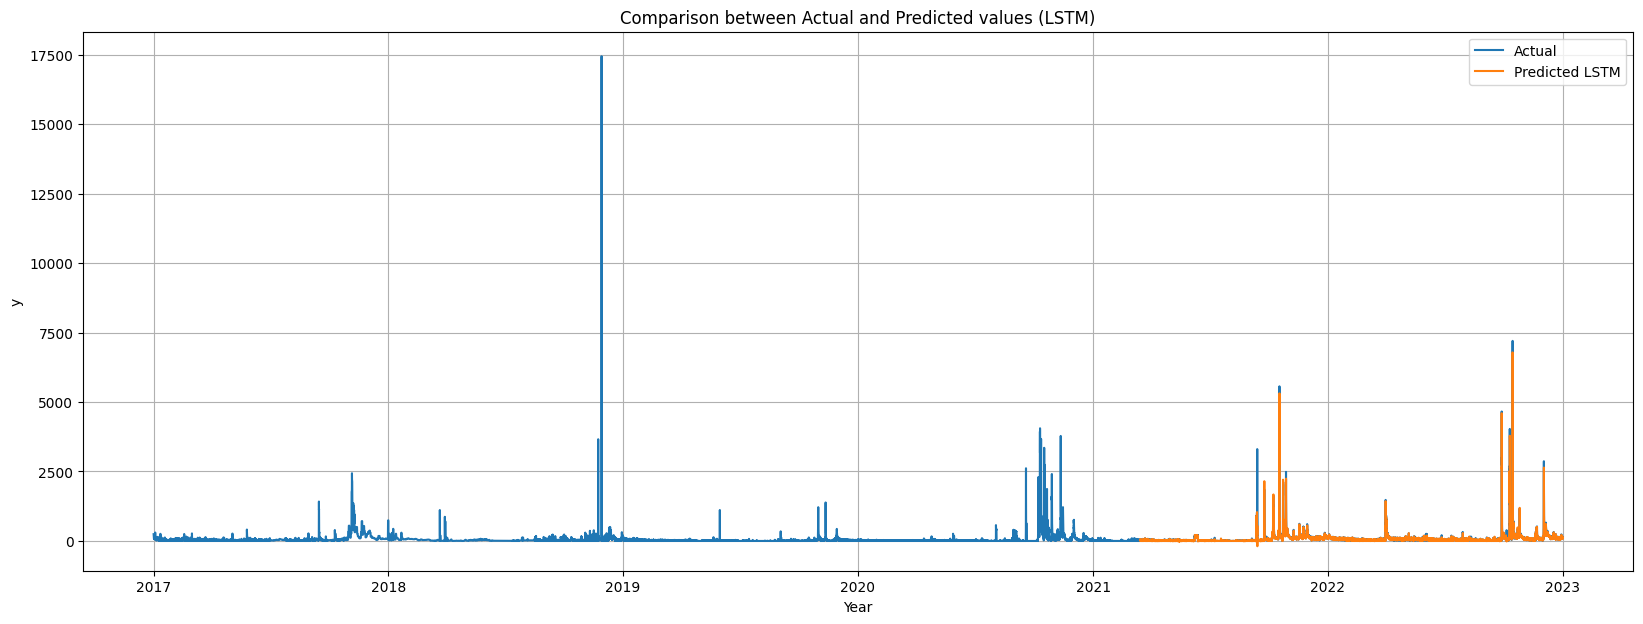

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datasets.csv')

data['year'] = pd.to_datetime(data['year'])  # Convert 'year' to datetime format

y = data['y'].values



plt.figure(figsize=(20,7))
plt.plot(data['year'], data['y'], label='Actual')
plt.plot(data['year'].iloc[-len(y_pred_lstm):], y_pred_lstm, label='Predicted LSTM')
plt.xlabel('Year')
plt.ylabel('y')
plt.title('Comparison between Actual and Predicted values (LSTM)')
plt.legend()
plt.grid()
plt.show()

In [7]:
#RNN
model_rnn= Sequential()
model_rnn.add(SimpleRNN(100, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
# model_rnn.add(BatchNormalization())
# model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_rnn.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_val, y_val))
joblib.dump(model_lstm, 'trained_rnn_model.joblib')

mse_rnn, mae_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)

y_pred_rnn = model_rnn.predict(X_test)
y_pred_rnn=y_pred_rnn.reshape(y_pred_rnn.shape[0])

#RNN
print("RNN")
print('MSE: %.2f' % mse_rnn)
print('RMSE: %.2f' % sqrt(mse_rnn))
print('MAE: %.2f' % mae_rnn)
print('R2: %.2f' % r2_score(y_test, y_pred_rnn))
print()

Epoch 1/50
1007/1007 [==============================] - 10s 8ms/step - loss: 6501.7476 - mae: 14.7766 - val_loss: 10681.9473 - val_mae: 29.8104
Epoch 2/50
1007/1007 [==============================] - 7s 7ms/step - loss: 24976.9668 - mae: 16.0548 - val_loss: 22093.7012 - val_mae: 34.6645
Epoch 3/50
1007/1007 [==============================] - 7s 7ms/step - loss: 73339.3906 - mae: 16.9086 - val_loss: 61332.4141 - val_mae: 78.5977
Epoch 4/50
1007/1007 [==============================] - 7s 7ms/step - loss: 9163.6885 - mae: 15.3182 - val_loss: 25398.2617 - val_mae: 36.0180
Epoch 5/50
1007/1007 [==============================] - 7s 7ms/step - loss: 22644.8535 - mae: 14.8474 - val_loss: 17429.3184 - val_mae: 35.3532
Epoch 6/50
1007/1007 [==============================] - 7s 7ms/step - loss: 19424.8691 - mae: 15.6821 - val_loss: 12797.5088 - val_mae: 31.9777
Epoch 7/50
1007/1007 [==============================] - 7s 7ms/step - loss: 16333.6836 - mae: 16.3918 - val_loss: 11970.5020 - val_mae: 2

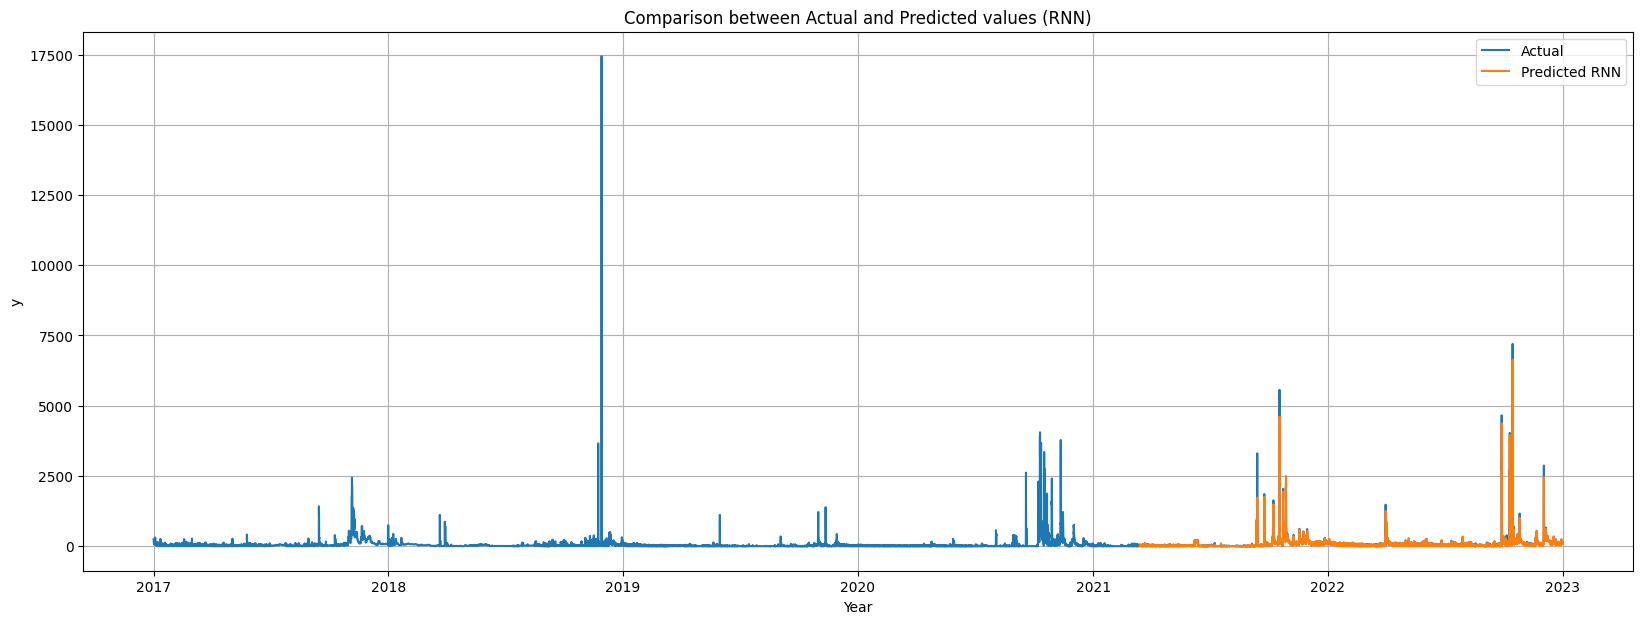

In [8]:

plt.figure(figsize=(20,7))
plt.plot(data['year'], data['y'], label='Actual')
plt.plot(data['year'].iloc[-len(y_pred_rnn):], y_pred_rnn, label='Predicted RNN')
plt.xlabel('Year')
plt.ylabel('y')
plt.title('Comparison between Actual and Predicted values (RNN)')
plt.legend()
plt.grid()
plt.show()

In [9]:
#GRU
model_gru = Sequential()
model_gru.add(GRU(100, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
# model_gru.add(BatchNormalization())
# model_gru.add(Dropout(0.2))
model_gru.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_gru.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_val, y_val))

joblib.dump(model_lstm, 'trained_gru_model.joblib')

mse_gru, mae_gru = model_gru.evaluate(X_test, y_test, verbose=0)

y_pred_gru = model_gru.predict(X_test)
y_pred_gru=y_pred_gru.reshape(y_pred_gru.shape[0])

#GRU
print("GRU")
print('MSE: %.2f' % mse_gru)
print('RMSE: %.2f' % sqrt(mse_gru))
print('MAE: %.2f' % mae_gru)
print('R2: %.2f' % r2_score(y_test, y_pred_gru))


Epoch 1/50
1007/1007 [==============================] - 16s 12ms/step - loss: 26826.2168 - mae: 15.8929 - val_loss: 29732.6211 - val_mae: 47.3493
Epoch 2/50
1007/1007 [==============================] - 12s 12ms/step - loss: 17088.7441 - mae: 16.9418 - val_loss: 9555.1416 - val_mae: 30.4409
Epoch 3/50
1007/1007 [==============================] - 12s 11ms/step - loss: 10785.9404 - mae: 14.0536 - val_loss: 7188.0054 - val_mae: 27.2482
Epoch 4/50
1007/1007 [==============================] - 12s 11ms/step - loss: 11563.1016 - mae: 17.4605 - val_loss: 12516.9600 - val_mae: 33.5285
Epoch 5/50
1007/1007 [==============================] - 11s 11ms/step - loss: 24838.5430 - mae: 17.7636 - val_loss: 43137.4883 - val_mae: 63.7240
Epoch 6/50
1007/1007 [==============================] - 12s 12ms/step - loss: 22802.0547 - mae: 16.7145 - val_loss: 86312.1641 - val_mae: 98.9364
Epoch 7/50
1007/1007 [==============================] - 12s 12ms/step - loss: 12791.2979 - mae: 14.8022 - val_loss: 11013.8174

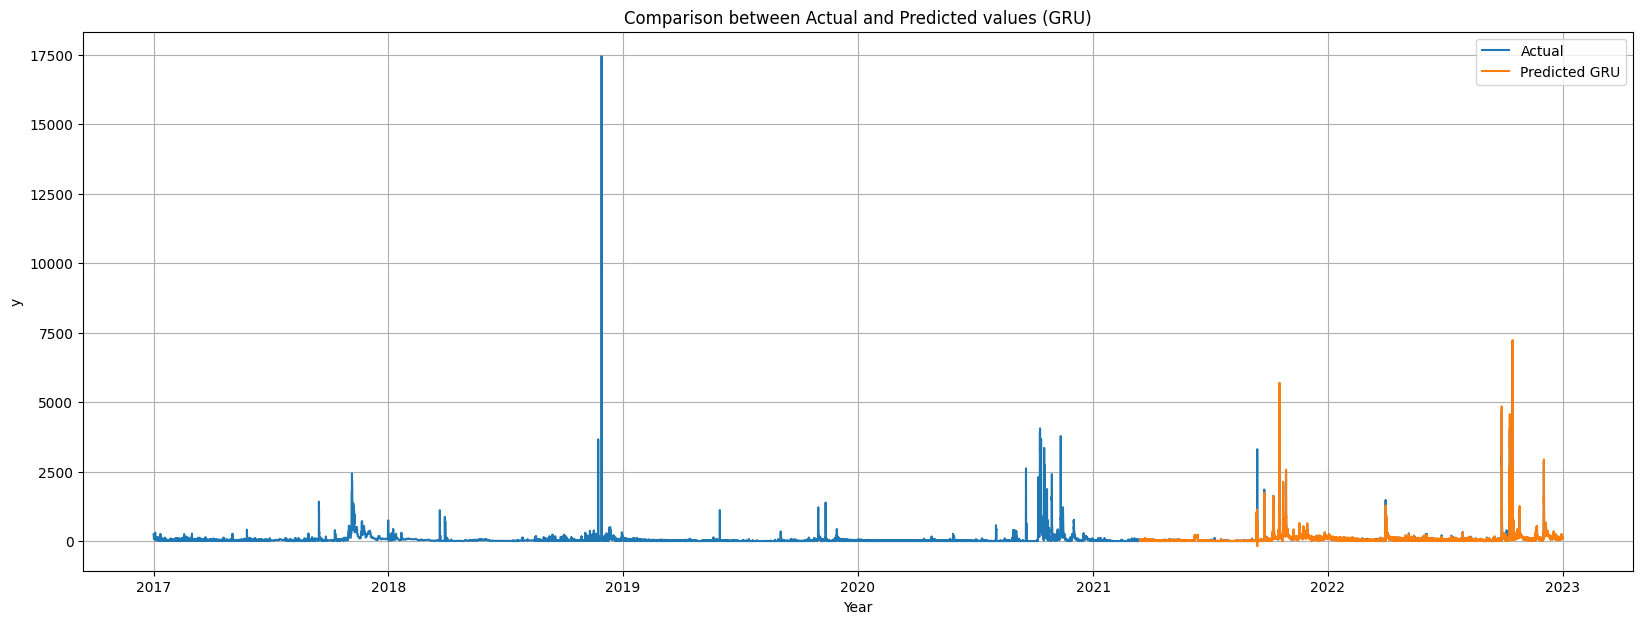

In [10]:
plt.figure(figsize=(20,7))
plt.plot(data['year'], data['y'], label='Actual')
plt.plot(data['year'].iloc[-len(y_pred_gru):], y_pred_gru, label='Predicted GRU')
plt.xlabel('Year')
plt.ylabel('y')
plt.title('Comparison between Actual and Predicted values (GRU)')
plt.legend()
plt.grid()
plt.show()